In [1]:
import pandas as pd
import nltk

In [2]:
telegraph = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/telegraph.csv", index_col=0)
guardian = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/guardian.csv", index_col=0)
independent = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/independent.csv", index_col=0)

In [3]:
stopwords = nltk.corpus.stopwords.words("english")

In [4]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from num2words import num2words 

In [5]:
def lemmatizer(x):
    token = nlp(x)
    #x.lemma_
    return ' '.join([t.lemma_ for t in token])

In [98]:
from nltk.stem import LancasterStemmer
import string as r

In [7]:
lancaster=LancasterStemmer()


In [8]:
import re

def cleaned_headline(sentence):
    new_sent = re.sub("\n", "", sentence)
    return new_sent

def cleaned_headline_2(sentence):
    new_sent = re.sub("\xa0", " ", sentence)
    return new_sent

def make_sentence(sentence):
    sent = sentence.split(' ')
    word = [word.lower() for word in sent]
    return word

def lemm_words(headline):
    lemmed_headline = ''
    for word in headline:
        lemm_word = lancaster.stem(word)
        lemmed_headline += lemm_word
        lemmed_headline += ' '
    return lemmed_headline

def remove_stops(headline):
    sent = headline.split(' ')
    properly_worded_headlines = []
    for word in sent:
        if word not in stopwords:
            properly_worded_headlines.append(word)
    return properly_worded_headlines

def hrefs_ids(href):
    first_part = href.split("https://www.telegraph.co.uk/")
    id_tag = first_part[1].split('/')
    return id_tag[0]

def date_time(date):
    if date != 'no date':
        x = pd.to_datetime(date)
        return str(x)[:10]
    else:
        return 0

def paper_name(hrefs):
    if 'telegraph' in hrefs:
        return 'telegraph'


def convert_num_to_words(headline):
    headline = ' '.join([num2words(i) if i.isdigit() else i for i in headline.split()])
    return headline

In [102]:
x = "Thursday briefing: EU's experts to give Oxford vaccine verdict"
x.rstrip()

"Thursday briefing: EU's experts to give Oxford vaccine verdict"

## Telegraph

In [9]:
telegraph['date'] = telegraph['times'].apply(date_time)

In [10]:
telegraph['id'] = telegraph['hrefs'].apply(hrefs_ids)

In [11]:
telegraph['title'] = telegraph['title'].apply(cleaned_headline)

In [12]:
telegraph['title'] = telegraph['title'].apply(cleaned_headline_2)

In [13]:
telegraph['title'] = telegraph['title'].apply(convert_num_to_words)

In [14]:
telegraph['new_title'] = telegraph.title.apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [15]:
telegraph['new_title'] = telegraph.new_title.apply(remove_stops)

In [16]:
telegraph['new_title'] = telegraph['new_title'].apply(lemm_words)

In [17]:
telegraph['newspaper_name'] = telegraph['hrefs'].apply(paper_name)

In [110]:
telegraph

,title,hrefs,times,date,id,new_title,newspaper_name,vaccine
0,Coronavirus latest news: Joint EU-UK statement...,https://www.telegraph.co.uk/global-health/scie...,"24 Mar 2021, 7:00pm",2021-03-24,global-health,coronavir latest new joint euuk stat insist wo...,telegraph,n/a
1,Europe tightens Covid restrictions as 'third w...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 4:30pm",2021-03-24,politics,europ tight covid restrict third wav tak hold,telegraph,n/a
2,Pubs may demand Covid passport before they wil...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 6:36pm",2021-03-24,politics,pub may demand covid passport pul pint,telegraph,n/a
3,Boris Johnson warns EU that vaccine ban target...,https://www.telegraph.co.uk/news/2021/03/24/eu...,"24 Mar 2021, 7:26pm",2021-03-24,news,bor johnson warn eu vaccin ban target uk backfir,telegraph,n/a
4,Lateral flow Covid testing too inaccurate to b...,https://www.telegraph.co.uk/news/2021/03/24/la...,"24 Mar 2021, 6:34pm",2021-03-24,news,lat flow covid test inacc us mass screening re...,telegraph,n/a
...,...,...,...,...,...,...,...,...
22390,China's coronavirus outbreak proves we must pa...,https://www.telegraph.co.uk/global-health/scie...,"24 Jan 2020, 2:33pm",2020-01-24,global-health,china coronavir outbreak prov must pay clos at...,telegraph,n/a
22391,Coronavirus tests come back negative on fourte...,https://www.telegraph.co.uk/news/2020/01/24/co...,"24 Jan 2020, 1:37pm",2020-01-24,news,coronavir test com back neg fourteen peopl test,telegraph,n/a
22392,The best of The Telegraph in audio: The battle...,https://www.telegraph.co.uk/news/2020/01/24/be...,"24 Jan 2020, 12:04pm",2020-01-24,news,the best the telegraph audio the battl billion...,telegraph,n/a
22393,"Coronavirus: China hastily builds new 1,000-be...",https://www.telegraph.co.uk/news/2020/01/24/wa...,"24 Jan 2020, 10:59am",2020-01-24,news,coronavir chin hasty build new 1000bed hospit ...,telegraph,n/a


### Covid Dict

In [19]:
tory_words_list = telegraph['new_title'].tolist()

In [20]:
news_dict = {}
for headline in tory_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in news_dict:
            news_dict[x] = 1
        else:
            news_dict[x] += 1

In [21]:
 sort_telegraph = sorted(news_dict.items(), key=lambda x: x[1], reverse=True)

In [22]:
telegraph_words_articles = []
for entry in sort_telegraph:
    if entry[1] >= 100:
        telegraph_words_articles.append(entry[0])
len(telegraph_words_articles)

411

### Cleaning Functions

In [23]:
stopwords = nltk.corpus.stopwords.words("english")

In [24]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [25]:
from num2words import num2words 

In [26]:
import re

def cleaned_headline(sentence):
    new_sent = re.sub("\n", "", sentence)
    return new_sent

def cleaned_headline_2(sentence):
    new_sent = re.sub("\xa0", " ", sentence)
    return new_sent

def make_sentence(sentence):
    sent = sentence.split(' ')
    word = [word.lower() for word in sent]
    return word

def lemm_words(headline):
    lemmed_headline = ''
    for word in headline:
        lemm_word = lancaster.stem(word)
        lemmed_headline += lemm_word
        lemmed_headline += ' '
    return lemmed_headline

def remove_stops(headline):
    sent = headline.split(' ')
    properly_worded_headlines = []
    for word in sent:
        if word not in stopwords:
            properly_worded_headlines.append(word)
    return properly_worded_headlines

def id_words(id):
    id_list = id.split('/')
    return id_list[0]

def guardian_date(date):
    return date[:10]


def paper_name(hrefs):
    if 'guardian' in hrefs:
        return 'guardian'

def convert_num_to_words(headline):
    headline = ' '.join([num2words(i) if i.isdigit() else i for i in headline.split()])
    return headline

In [27]:
x = guardian['_date'][1]
guardian_date(x)

'2021-03-19'

# Guardian

In [28]:
guardian

,id,web_title,web_url,_date
0,education/2021/mar/10/gillian-oxford-obituary,Gillian Oxford obituary,https://www.theguardian.com/education/2021/mar...,2021-03-10T15:51:27Z
1,politics/2021/mar/19/boris-johnson-receives-fi...,Boris Johnson receives Oxford/AstraZeneca Covi...,https://www.theguardian.com/politics/2021/mar/...,2021-03-19T19:23:04Z
2,books/2021/mar/24/campaign-to-buy-jrr-tolkiens...,Campaign to buy JRR Tolkien's Oxford home fails,https://www.theguardian.com/books/2021/mar/24/...,2021-03-24T12:36:38Z
3,world/2021/feb/19/german-politicians-counter-a...,Scepticism over Oxford vaccine threatens Europ...,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19T13:53:59Z
4,world/2021/mar/18/thursday-briefing-eus-expert...,Thursday briefing: EU's experts to give Oxford...,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18T06:31:09Z
...,...,...,...,...
32053,sport/live/2020/apr/28/brazil-v-france-world-c...,France edge Brazil in World Cup 1986 quarter-f...,https://www.theguardian.com/sport/live/2020/ap...,2020-04-28T21:28:15Z
32054,sport/live/2020/jul/11/england-v-west-indies-f...,"England v West Indies: first Test, day four – ...",https://www.theguardian.com/sport/live/2020/ju...,2020-07-11T20:04:35Z
32055,politics/live/2020/mar/09/boris-johnson-cobra-...,Containment of virus 'extremely unlikely to wo...,https://www.theguardian.com/politics/live/2020...,2020-03-09T18:11:14Z
32056,us-news/live/2020/mar/11/joe-biden-bernie-sand...,Trump says US to suspend travel from Europe in...,https://www.theguardian.com/us-news/live/2020/...,2020-03-12T04:29:30Z


In [29]:
guardian['id'] = guardian['id'].apply(id_words)

In [30]:
guardian['date'] = guardian['_date'].apply(guardian_date)

In [31]:
guardian['new_title'] = guardian['web_title'].apply(cleaned_headline)

In [32]:
guardian['new_title'] = guardian['web_title'].apply(convert_num_to_words)

In [33]:
guardian['new_title'] = guardian['new_title'].apply(cleaned_headline_2)

In [34]:
guardian['new_title'] = guardian.new_title.apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [35]:
guardian['new_title'] = guardian.new_title.apply(remove_stops)

In [36]:
guardian['new_title'] = guardian['new_title'].apply(lemm_words)

In [37]:
guardian['hrefs'] = guardian['web_url']

In [38]:
guardian['title'] = guardian['web_title']

In [39]:
guardian['newspaper_name'] = guardian['web_url'].apply(paper_name)

### Covid Dict

In [40]:
guardian_words_list = guardian['new_title'].tolist()

In [41]:
guardian_news_dic = {}
for headline in guardian_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in guardian_news_dic:
            guardian_news_dic[x] = 1
        else:
            guardian_news_dic[x] += 1

In [42]:
 sort_guardian = sorted(guardian_news_dic.items(), key=lambda x: x[1], reverse=True)

In [43]:
# sort_guardian

In [44]:
guardian_news_words = []
for entry in sort_guardian:
    if entry[1] >= 100:
        guardian_news_words.append(entry[0])
len(guardian_news_words)

574

In [45]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [46]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [47]:
guardian["corona_score"]=guardian["new_title"].apply(lambda x: corona_related(x))

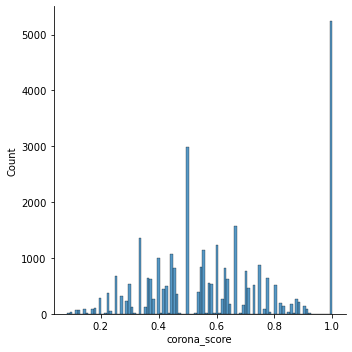

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(guardian["corona_score"],bins=100)
plt.show()

# Independent

In [49]:
def hrefs_ids(href):
    tag = href.split('/')
    x = str(tag[len(tag)-1]).split('-')
    all_tags = (x + tag)
    save = ['uk',' world', 'us', ' uk', ' politics','tech', 'science',  'health', 'business' ,'infact', 'coronavirus']
    checking = sorted([item for item in save if item in all_tags])
    if len(checking) > 0:
        if 'coronavirus' in checking:
            return 'coronavirus'
        else:
            return checking[0]
    else:
        return 'drop'


def paper_name(hrefs):
    if 'independent' in hrefs:
        return 'independent'

In [50]:
x = 'https://www.independent.co.uk/news/business/comment/saudi-arabia-carbon-cop26-climate-change-b1824383.html'
hrefs_ids(x)

'business'

In [51]:
independent['id'] = independent['hrefs'].apply(hrefs_ids)

In [52]:
independent['id'].value_counts()

drop           70367
coronavirus    20362
uk              9548
us              4077
health          1530
business        1049
science          418
tech             127
infact             7
Name: id, dtype: int64

In [53]:
independent = independent[independent['id'] != 'drop'].reset_index(drop=True)

In [54]:
independent

,title,hrefs,date,id
0,Coronavirus: Italy deaths jump by more than ha...,https://www.independent.co.uk/news/health/coro...,2020-03-09,coronavirus
1,£5bn for faster broadband to feature in Budget...,https://www.independent.co.uk/news/uk/politics...,2020-03-09,uk
2,Budget: Rishi Sunak urged to commit extra £33b...,https://www.independent.co.uk/news/uk/politics...,2020-03-09,uk
3,Police shoot man dead in central London after ...,https://www.independent.co.uk/news/uk/crime/lo...,2020-03-09,uk
4,Coronavirus: BA cancels dozens of Italy flight...,https://www.independent.co.uk/travel/news-and-...,2020-03-09,coronavirus
...,...,...,...,...
37113,Dangerous so-called abortion reversal treatmen...,https://www.independent.co.uk/news/uk/home-new...,2021-03-25,uk
37114,"‘Let him answer the question, Barry’: Parliame...",https://www.independent.co.uk/news/uk/politics...,2021-03-25,uk
37115,Big Tech branded smug and untouchable: everyth...,https://www.independent.co.uk/news/world/ameri...,2021-03-25,tech
37116,University of Aberdeen to become one of the fi...,https://www.independent.co.uk/news/uk/home-new...,2021-03-25,uk


In [55]:
independent['new_title'] = independent['title'].apply(cleaned_headline)

In [56]:
independent['new_title'] = independent['title'].apply(convert_num_to_words)

In [57]:
independent['new_title'] = independent['new_title'].apply(cleaned_headline_2)

In [58]:
independent['new_title'] = independent.new_title.apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [59]:
independent['new_title'] = independent.new_title.apply(remove_stops)

In [60]:
independent['new_title'] = independent['new_title'].apply(lemm_words)

In [61]:
independent['newspaper_name'] = independent['hrefs'].apply(paper_name)

### Covid Dict

In [62]:
independent_words_list = independent['new_title'].tolist()

In [63]:
independent_word_dict = {}
for headline in independent_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in independent_word_dict:
            independent_word_dict[x] = 1
        else:
            independent_word_dict[x] += 1


In [64]:
 sort_independent = sorted(independent_word_dict.items(), key=lambda x: x[1], reverse=True)

In [65]:
 sort_independent

[('', 39363),
 ('coronavir', 13054),
 ('us', 3823),
 ('uk', 3693),
 ('say', 3544),
 ('new', 3427),
 ('trump', 2742),
 ('lockdown', 2640),
 ('govern', 2114),
 ('johnson', 2009),
 ('bor', 1915),
 ('warn', 1844),
 ('covid', 1754),
 ('the', 1649),
 ('vaccin', 1625),
 ('test', 1619),
 ('pandem', 1591),
 ('pol', 1386),
 ('could', 1331),
 ('off', 1321),
 ('peopl', 1262),
 ('work', 1253),
 ('two', 1233),
 ('covid19', 1125),
 ('liv', 1092),
 ('on', 1048),
 ('cas', 1039),
 ('brexit', 1010),
 ('fac', 1005),
 ('hom', 994),
 ('thousand', 941),
 ('nhs', 913),
 ('amid', 904),
 ('bid', 890),
 ('heal', 885),
 ('how', 882),
 ('day', 859),
 ('plan', 841),
 ('cal', 831),
 ('dea', 821),
 ('rul', 819),
 ('may', 811),
 ('year', 808),
 ('hospit', 801),
 ('help', 797),
 ('report', 796),
 ('first', 790),
 ('claim', 788),
 ('hundr', 780),
 ('tim', 770),
 ('get', 767),
 ('wom', 749),
 ('i', 736),
 ('show', 730),
 ('car', 728),
 ('vir', 718),
 ('elect', 715),
 ('cris', 699),
 ('min', 698),
 ('man', 697),
 ('what',

In [66]:
independent_news_words = []
for entry in sort_independent:
    if entry[1] >= 100:
        independent_news_words.append(entry[0])
len(independent_news_words)

749

In [67]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [68]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [69]:
independent["corona_score"]=independent["new_title"].apply(lambda x: corona_related(x))

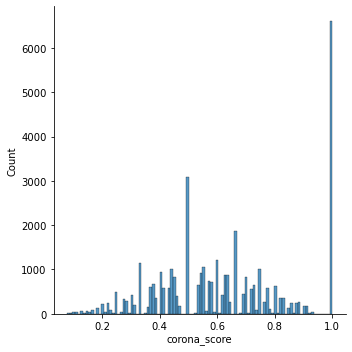

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(independent["corona_score"],bins=100)
plt.show()

## Create new dataframes

In [71]:
covid_independent = independent[independent['corona_score'] > 0.5].reset_index(drop=True)
covid_independent['hrefs'][68]

'https://www.independent.co.uk/news/health/coronavirus-uk-latest-school-closures-events-cancelled-rory-stewart-matt-hancock-boris-johnson-a9389051.html'

In [72]:
covid_independent['id'].unique()

array(['coronavirus', 'uk', 'us', 'business', 'health', 'science', 'tech',
       'infact'], dtype=object)

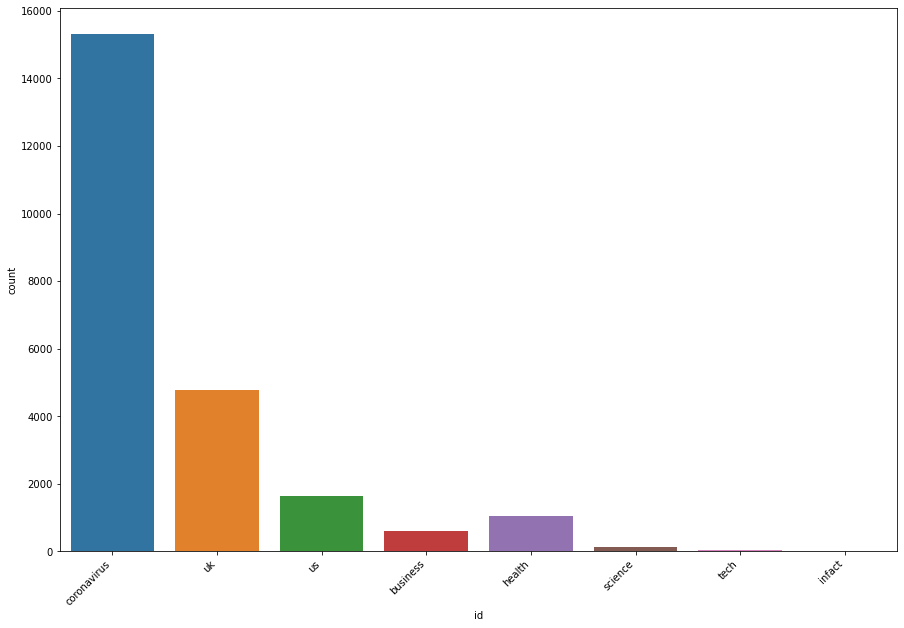

In [73]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_independent)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [74]:
covid_guardian = guardian[guardian['corona_score'] > 0.5].reset_index(drop=True)

In [75]:
guardian_drop_list = ['sport', 'football', 'books', 'tv-and-radio', 'music', 'stage', 'media', 'artanddesign', 'film', 'food', 'fashion', 'all-in-all-together', 'membership', 'games', 'theobserber', 'go-make-it', 'animals-farmed', 'gnm-press-office', 'education']

In [76]:
covid_guardian = covid_guardian[~covid_guardian.id.isin(guardian_drop_list)]
counts = covid_guardian['id'].value_counts()
covid_guardian = covid_guardian[~covid_guardian['id'].isin(counts[counts < 9].reset_index(drop=True))]
covid_guardian

,id,web_title,web_url,_date,date,new_title,hrefs,title,newspaper_name,corona_score
1,politics,Boris Johnson receives Oxford/AstraZeneca Covi...,https://www.theguardian.com/politics/2021/mar/...,2021-03-19T19:23:04Z,2021-03-19,bor johnson receiv oxfordastrazenec covid vaccin,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,guardian,1.000000
3,world,Scepticism over Oxford vaccine threatens Europ...,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19T13:53:59Z,2021-02-19,sceiv oxford vaccin threatens europ immun push,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,guardian,1.000000
4,world,Thursday briefing: EU's experts to give Oxford...,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18T06:31:09Z,2021-03-18,thursday brief eu expert giv oxford vaccin ver...,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,guardian,1.000000
5,world,Oxford/AstraZeneca vaccine: which countries ha...,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16T17:30:36Z,2021-03-16,oxfordastrazenec vaccin country paus jab,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,guardian,1.000000
6,world,Chaos in Germany and Italy after suspension of...,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16T14:08:31Z,2021-03-16,chao germany ita suspend oxford vaccin,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,guardian,1.000000
...,...,...,...,...,...,...,...,...,...,...
18731,travel,The end of tourism?,https://www.theguardian.com/travel/2020/jun/18...,2020-06-18T05:00:41Z,2020-06-18,the end tour,https://www.theguardian.com/travel/2020/jun/18...,The end of tourism?,guardian,1.000000
18742,us-news,"Trump to hold first rally in months in Tulsa, ...",https://www.theguardian.com/us-news/live/2020/...,2020-06-11T01:52:09Z,2020-06-11,trump hold first ral month tuls city hist dead...,https://www.theguardian.com/us-news/live/2020/...,"Trump to hold first rally in months in Tulsa, ...",guardian,0.571429
18743,us-news,Trump acknowledges 'new administration' – as i...,https://www.theguardian.com/us-news/live/2021/...,2021-01-08T06:49:33Z,2021-01-08,trump acknowledg new admin hap,https://www.theguardian.com/us-news/live/2021/...,Trump acknowledges 'new administration' – as i...,guardian,0.571429
18745,politics,Containment of virus 'extremely unlikely to wo...,https://www.theguardian.com/politics/live/2020...,2020-03-09T18:11:14Z,2020-03-09,contain vir extrem unlik work say bor johnson ...,https://www.theguardian.com/politics/live/2020...,Containment of virus 'extremely unlikely to wo...,guardian,1.000000


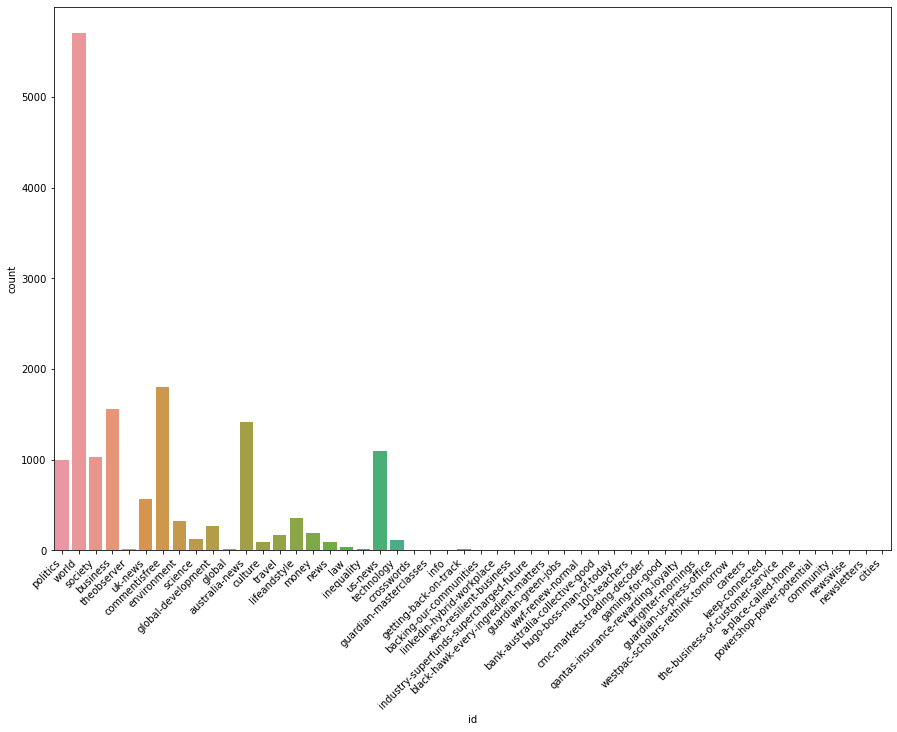

In [77]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_guardian)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Vaccine

In [78]:
vaccine=["biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen", 'oxfordastrazeneca']


In [79]:
def vaccine_mentioned(x):
    temp_list=x.split(' ')
    for word in temp_list:
        word = word.lower()
        #print(word)
        if word in vaccine:
            return word
        else:
            return "n/a"  

In [80]:
telegraph["vaccine"]=telegraph["new_title"].apply(lambda x: vaccine_mentioned(x))
telegraph["vaccine"].value_counts()

n/a            22334
oxford            58
astrazeneca        2
moderna            1
Name: vaccine, dtype: int64

In [81]:
covid_guardian["vaccine"]=covid_guardian["new_title"].apply(lambda x: vaccine_mentioned(x))
covid_guardian["vaccine"].value_counts()

n/a         16000
oxford         42
biontech        1
Name: vaccine, dtype: int64

In [82]:
covid_independent['vaccine'] = covid_independent['new_title'].apply(lambda x: vaccine_mentioned(x))
covid_independent['vaccine'].value_counts()

n/a            23562
oxford            20
biontech           3
astrazeneca        1
Name: vaccine, dtype: int64

## Create New DataFrame

In [118]:
newspaper_df = pd.concat([covid_guardian, telegraph, covid_independent], axis=0)


In [119]:
newspaper_df = newspaper_df.drop(['web_title', 'web_url', '_date', 'times', 'corona_score'], axis=1)

In [120]:
cols = ['hrefs', 'title', 'new_title', 'id', 'date', 'newspaper_name', 'vaccine']

In [121]:
newspaper_df = newspaper_df[cols]

In [122]:
newspaper_df

,hrefs,title,new_title,id,date,newspaper_name,vaccine
1,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,bor johnson receiv oxfordastrazenec covid vaccin,politics,2021-03-19,guardian,n/a
3,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,sceiv oxford vaccin threatens europ immun push,world,2021-02-19,guardian,n/a
4,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,thursday brief eu expert giv oxford vaccin ver...,world,2021-03-18,guardian,n/a
5,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,oxfordastrazenec vaccin country paus jab,world,2021-03-16,guardian,n/a
6,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,chao germany ita suspend oxford vaccin,world,2021-03-16,guardian,n/a
...,...,...,...,...,...,...,...
23581,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
23582,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
23583,https://www.independent.co.uk/independentpremi...,The problem with Johnson’s vaccine passports f...,the problem johnson vaccin passport pub,business,2021-03-25,independent,n/a
23584,https://www.independent.co.uk/voices/editorial...,Reality is dawning on the EU: export bans are ...,real dawn eu export ban counterproduc cas covi...,uk,2021-03-25,independent,n/a


In [125]:
def stip_headline(headline):
    x =headline.rstrip()
    return x

In [126]:
newspaper_df['title'] = newspaper_df['title'].apply(stip_headline)

In [127]:
newspaper_df.reset_index(drop=True)

,hrefs,title,new_title,id,date,newspaper_name,vaccine
0,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,bor johnson receiv oxfordastrazenec covid vaccin,politics,2021-03-19,guardian,n/a
1,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,sceiv oxford vaccin threatens europ immun push,world,2021-02-19,guardian,n/a
2,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,thursday brief eu expert giv oxford vaccin ver...,world,2021-03-18,guardian,n/a
3,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,oxfordastrazenec vaccin country paus jab,world,2021-03-16,guardian,n/a
4,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,chao germany ita suspend oxford vaccin,world,2021-03-16,guardian,n/a
...,...,...,...,...,...,...,...
62019,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
62020,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
62021,https://www.independent.co.uk/independentpremi...,The problem with Johnson’s vaccine passports f...,the problem johnson vaccin passport pub,business,2021-03-25,independent,n/a
62022,https://www.independent.co.uk/voices/editorial...,Reality is dawning on the EU: export bans are ...,real dawn eu export ban counterproduc cas covi...,uk,2021-03-25,independent,n/a


In [128]:
newspaper_df.vaccine.value_counts()

n/a            61896
oxford           120
biontech           4
astrazeneca        3
moderna            1
Name: vaccine, dtype: int64

In [129]:
newspaper_df.to_csv('C:/Users/jw156/Ironhack/vaccine/newspapers.csv')
print("Sucessfully saved")

Sucessfully saved


# Dictionary for newspapers

In [90]:
newspaper_words = newspaper_df['new_title'].tolist()

In [91]:
newspaper_words_dict = {}
for headline in newspaper_words:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in newspaper_words_dict:
            newspaper_words_dict[x] = 1
        else:
            newspaper_words_dict[x] += 1


In [92]:
 sort_newspaper = sorted(newspaper_words_dict.items(), key=lambda x: x[1], reverse=True)

In [93]:
 sort_newspaper

[('', 70061),
 ('coronavir', 18342),
 ('lockdown', 6822),
 ('uk', 6513),
 ('covid', 6029),
 ('new', 5641),
 ('say', 5271),
 ('us', 4706),
 ('covid19', 4163),
 ('vaccin', 3938),
 ('johnson', 3547),
 ('govern', 3449),
 ('the', 3437),
 ('bor', 3288),
 ('test', 3200),
 ('warn', 3139),
 ('trump', 2928),
 ('could', 2739),
 ('work', 2551),
 ('pandem', 2457),
 ('cas', 2228),
 ('peopl', 2228),
 ('on', 2118),
 ('fac', 2063),
 ('hom', 2024),
 ('two', 1839),
 ('nhs', 1735),
 ('cris', 1723),
 ('off', 1707),
 ('may', 1697),
 ('plan', 1691),
 ('how', 1689),
 ('i', 1661),
 ('england', 1633),
 ('get', 1625),
 ('hap', 1619),
 ('car', 1614),
 ('rul', 1600),
 ('liv', 1594),
 ('pol', 1578),
 ('heal', 1577),
 ('first', 1568),
 ('back', 1506),
 ('tim', 1486),
 ('amid', 1467),
 ('travel', 1429),
 ('help', 1403),
 ('ris', 1401),
 ('nee', 1400),
 ('day', 1394),
 ('hospit', 1377),
 ('thousand', 1367),
 ('report', 1339),
 ('year', 1330),
 ('hundr', 1329),
 ('fear', 1315),
 ('cal', 1274),
 ('econom', 1273),
 ('wee